Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../../data/bnd_buffer/1/'

NP = 1_000_000
NC = 1_000_000
IPP = 1_000
BB = 1_200_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}10/prod_cons_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}10/prod_cons_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}10/prod_cons_bounded_buffer_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}10/prod_cons_bounded_buffer_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)


Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Apr 13 21:37:39 2025 +0200) (509.97ms ela...,0.111,0.0000,0.511,2.54,0.04,3.07,54.20 C,Nominal
1,(Sun Apr 13 21:37:39 2025 +0200) (508.78ms ela...,1.230,0.0531,0.620,3.21,0.25,19.81,54.20 C,Nominal
2,(Sun Apr 13 21:37:40 2025 +0200) (506.02ms ela...,3.140,3.7900,1.570,9.48,0.88,51.27,53.84 C,Nominal
3,(Sun Apr 13 21:37:40 2025 +0200) (507.92ms ela...,2.460,0.0000,0.686,4.48,0.57,35.82,53.84 C,Nominal
4,(Sun Apr 13 21:37:41 2025 +0200) (508.39ms ela...,2.830,2.8900,1.630,8.32,1.01,55.47,53.50 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(19632, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Apr 13 21:37:50 2025 +0200) (1008.19ms el...,38.5,0.0116,1.430,40.82,3.87,98.05,58.19 C,Nominal
1,(Sun Apr 13 21:37:52 2025 +0200) (1004.81ms el...,34.6,0.0000,1.040,37.57,3.76,97.84,61.45 C,Nominal
2,(Sun Apr 13 21:37:53 2025 +0200) (1004.79ms el...,35.5,0.0000,1.160,38.60,3.71,97.30,64.23 C,Nominal
3,(Sun Apr 13 21:37:54 2025 +0200) (1005.62ms el...,24.2,0.0000,1.340,27.50,2.55,99.05,65.58 C,Nominal
4,(Sun Apr 13 21:37:55 2025 +0200) (1007.31ms el...,12.0,0.0000,0.765,14.70,1.13,99.53,65.63 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Apr 14 09:08:20 2025 +0200) (511.53ms ela...,0.1090,0.0000,0.504,2.19,0.06,4.10,66.80 C,Nominal
1,(Mon Apr 14 09:08:21 2025 +0200) (508.24ms ela...,0.8770,0.0339,0.553,2.95,0.16,13.08,66.55 C,Nominal
2,(Mon Apr 14 09:08:21 2025 +0200) (505.86ms ela...,0.3680,0.0000,0.508,2.49,0.09,6.57,66.55 C,Nominal
3,(Mon Apr 14 09:08:22 2025 +0200) (508.71ms ela...,0.0642,0.0000,0.502,2.10,0.05,3.19,66.29 C,Nominal
4,(Mon Apr 14 09:08:23 2025 +0200) (507.99ms ela...,0.0883,0.0000,0.501,2.12,0.05,3.21,66.29 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(45157, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Apr 14 09:08:32 2025 +0200) (1009.12ms el...,16.7,0.000,1.020,19.06,2.03,98.88,64.47 C,Nominal
1,(Mon Apr 14 09:08:33 2025 +0200) (1004.19ms el...,15.9,0.000,0.992,18.17,1.92,99.14,64.41 C,Nominal
2,(Mon Apr 14 09:08:34 2025 +0200) (1004.36ms el...,17.1,0.018,1.050,19.47,1.97,96.82,64.95 C,Nominal
3,(Mon Apr 14 09:08:35 2025 +0200) (1004.47ms el...,16.1,0.000,0.963,18.34,1.84,96.48,65.30 C,Nominal
4,(Mon Apr 14 09:08:36 2025 +0200) (1004.68ms el...,31.6,0.000,1.410,34.94,3.30,98.81,66.38 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

print(scala_idle_data.dtypes)
print(scala_bench_data.dtypes)
print(erlang_idle_data.dtypes)
print(erlang_bench_data.dtypes)

Timestamp                datetime64[ns]
CPU Core Power(W)               float64
GT Power(W)                     float64
DRAM Power(W)                   float64
(CPUs+GT+SA) Power(W)           float64
Avg Num Cores Active            float64
Cores Active(%)                 float64
CPU Temp(C)                     float64
Pressure Level                   object
Time Elapsed (ms)               float64
dtype: object
Timestamp                datetime64[ns]
CPU Core Power(W)               float64
GT Power(W)                     float64
DRAM Power(W)                   float64
(CPUs+GT+SA) Power(W)           float64
Avg Num Cores Active            float64
Cores Active(%)                 float64
CPU Temp(C)                     float64
Pressure Level                   object
Time Elapsed (ms)               float64
dtype: object
Timestamp                datetime64[ns]
CPU Core Power(W)               float64
GT Power(W)                     float64
DRAM Power(W)                   float64
(CPUs+GT+SA)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-13 21:37:39,0.111,0.0000,0.511,2.54,0.04,3.07,54.20,Nominal,509.97
1,2025-04-13 21:37:39,1.230,0.0531,0.620,3.21,0.25,19.81,54.20,Nominal,508.78
2,2025-04-13 21:37:40,3.140,3.7900,1.570,9.48,0.88,51.27,53.84,Nominal,506.02
3,2025-04-13 21:37:40,2.460,0.0000,0.686,4.48,0.57,35.82,53.84,Nominal,507.92
4,2025-04-13 21:37:41,2.830,2.8900,1.630,8.32,1.01,55.47,53.50,Nominal,508.39


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(19632, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-13 21:37:50,38.5,0.0116,1.430,40.82,3.87,98.05,58.19,Nominal,1008.19
1,2025-04-13 21:37:52,34.6,0.0000,1.040,37.57,3.76,97.84,61.45,Nominal,1004.81
2,2025-04-13 21:37:53,35.5,0.0000,1.160,38.60,3.71,97.30,64.23,Nominal,1004.79
3,2025-04-13 21:37:54,24.2,0.0000,1.340,27.50,2.55,99.05,65.58,Nominal,1005.62
4,2025-04-13 21:37:55,12.0,0.0000,0.765,14.70,1.13,99.53,65.63,Nominal,1007.31


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-14 09:08:20,0.1090,0.0000,0.504,2.19,0.06,4.10,66.80,Nominal,511.53
1,2025-04-14 09:08:21,0.8770,0.0339,0.553,2.95,0.16,13.08,66.55,Nominal,508.24
2,2025-04-14 09:08:21,0.3680,0.0000,0.508,2.49,0.09,6.57,66.55,Nominal,505.86
3,2025-04-14 09:08:22,0.0642,0.0000,0.502,2.10,0.05,3.19,66.29,Nominal,508.71
4,2025-04-14 09:08:23,0.0883,0.0000,0.501,2.12,0.05,3.21,66.29,Nominal,507.99


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(45157, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-14 09:08:32,16.7,0.000,1.020,19.06,2.03,98.88,64.47,Nominal,1009.12
1,2025-04-14 09:08:33,15.9,0.000,0.992,18.17,1.92,99.14,64.41,Nominal,1004.19
2,2025-04-14 09:08:34,17.1,0.018,1.050,19.47,1.97,96.82,64.95,Nominal,1004.36
3,2025-04-14 09:08:35,16.1,0.000,0.963,18.34,1.84,96.48,65.30,Nominal,1004.47
4,2025-04-14 09:08:36,31.6,0.000,1.410,34.94,3.30,98.81,66.38,Nominal,1004.68


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


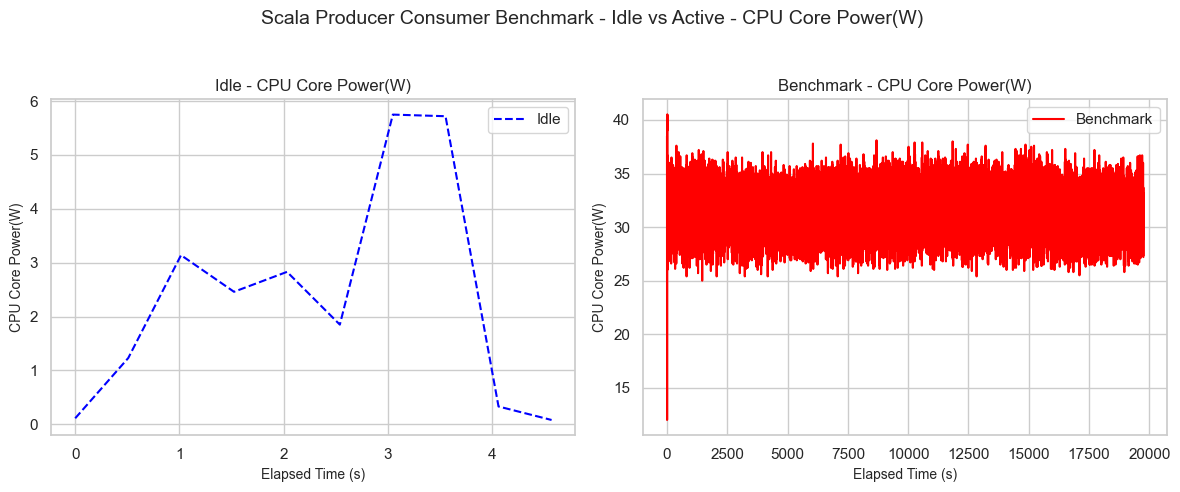

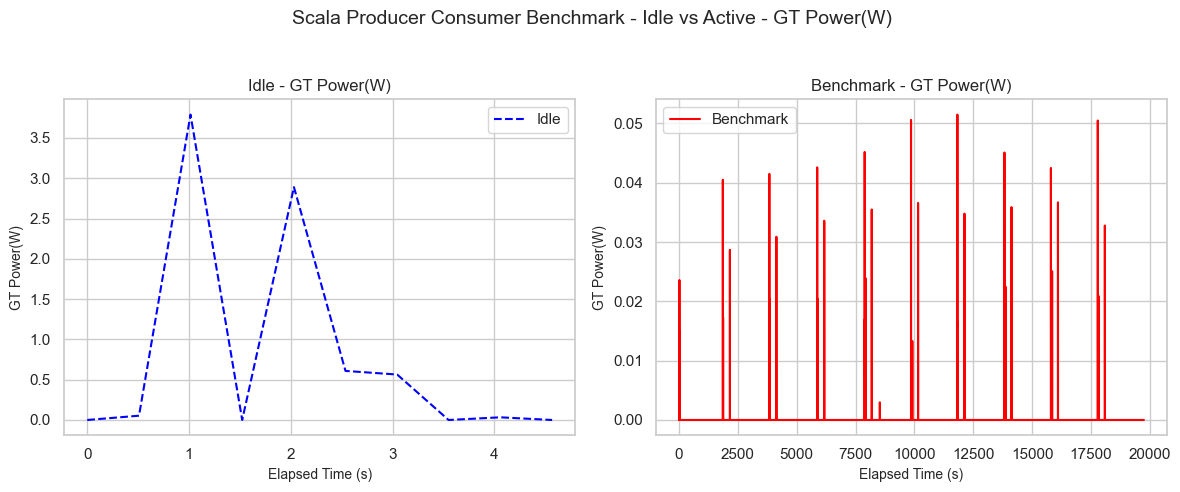

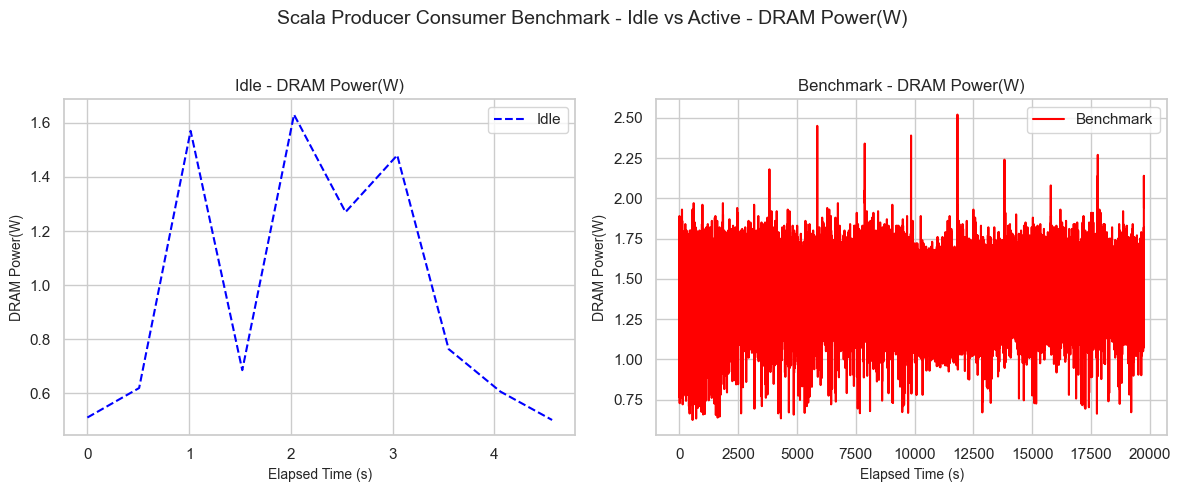

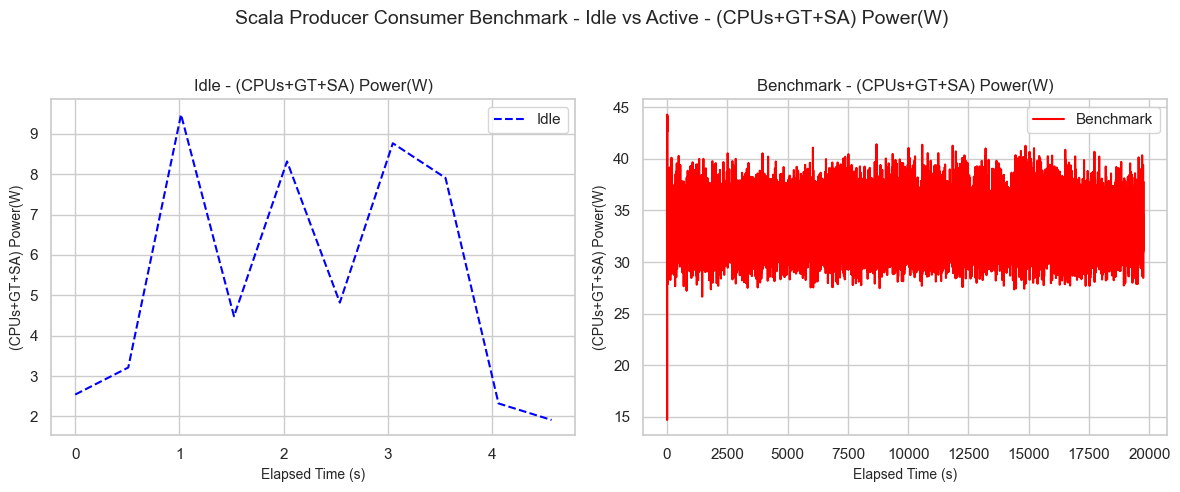

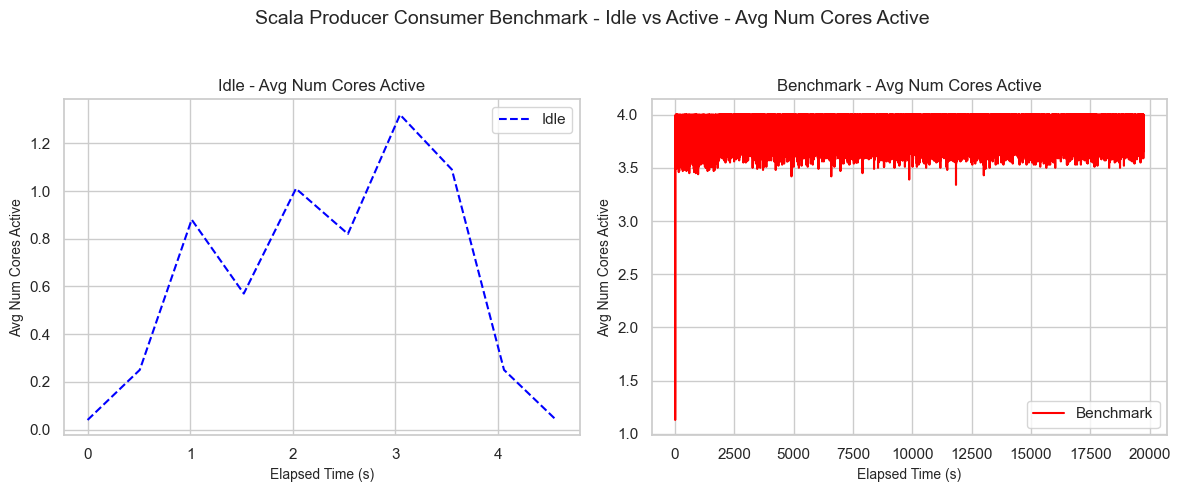

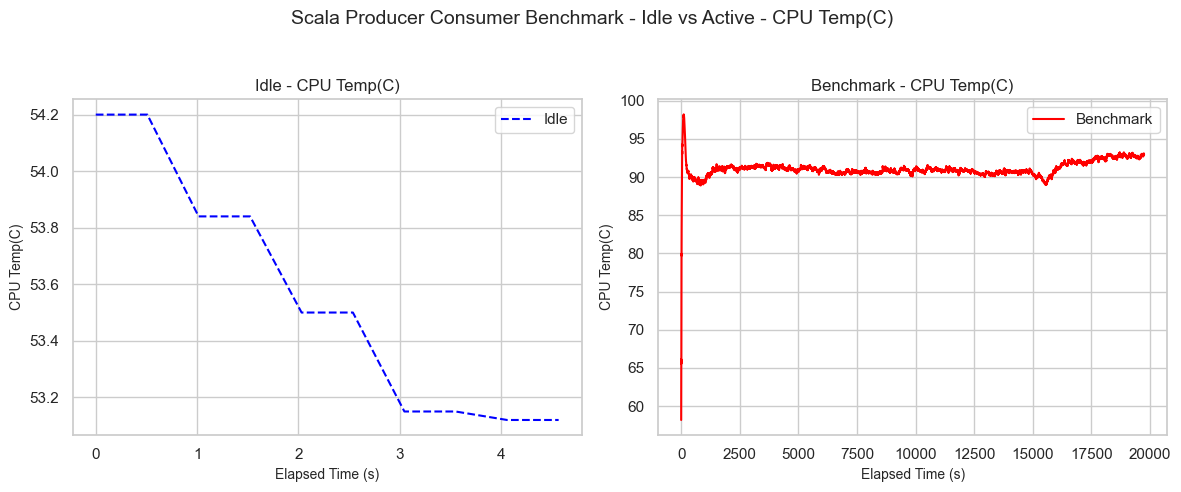

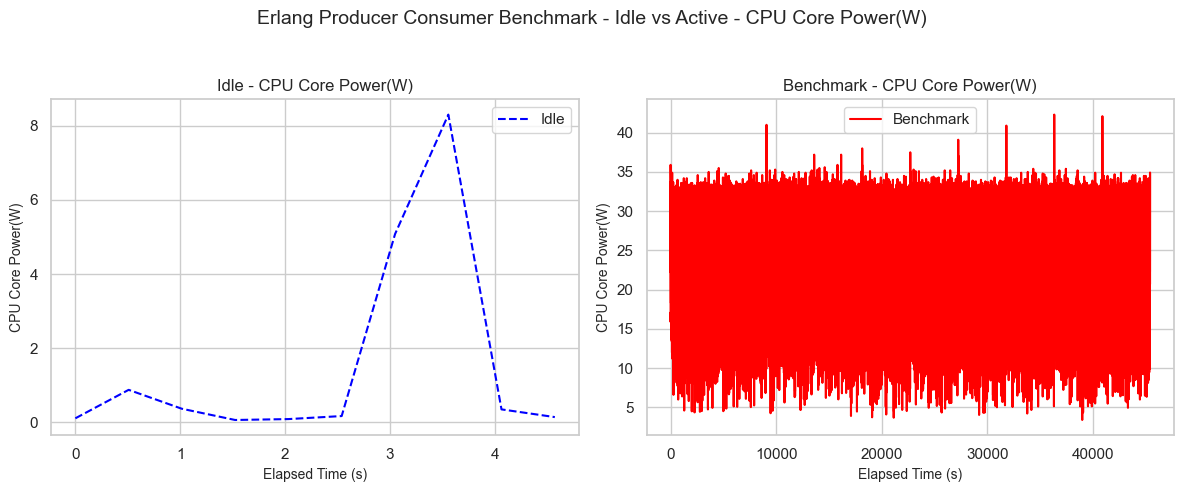

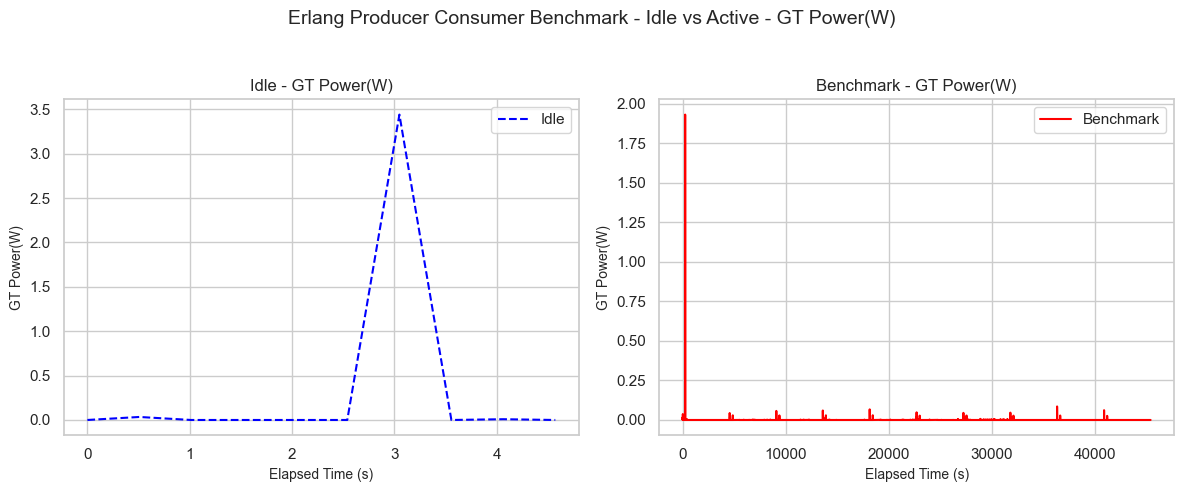

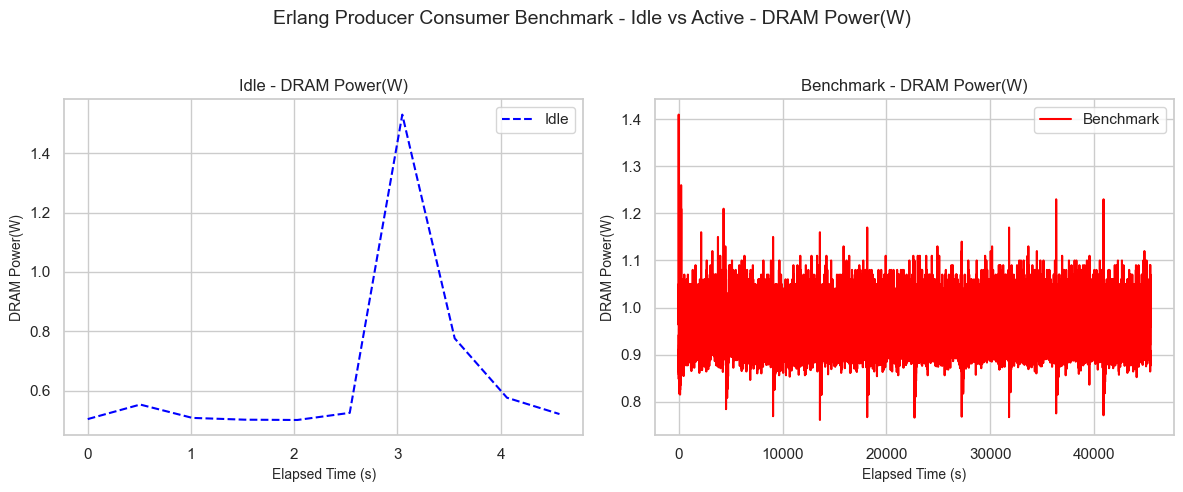

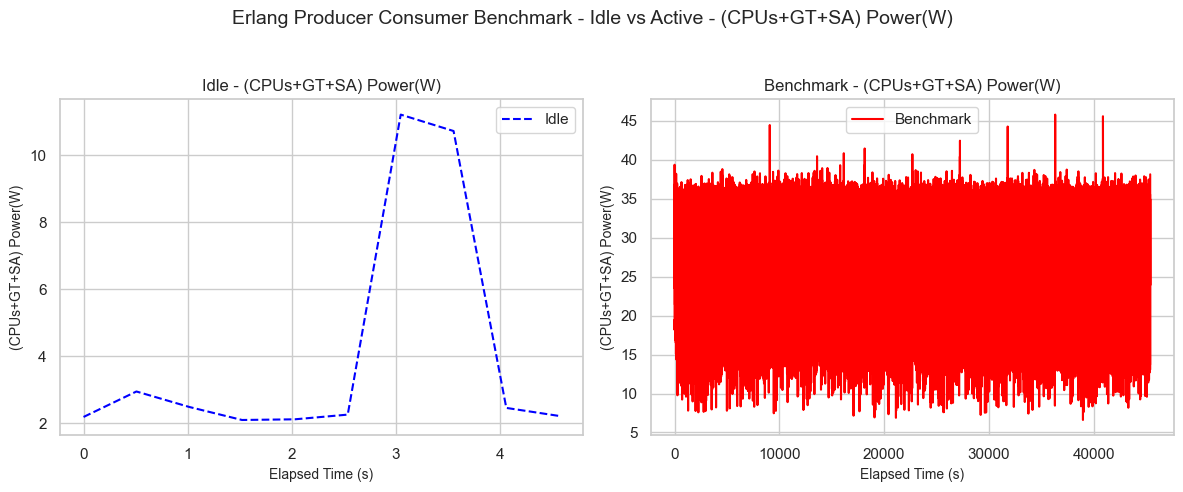

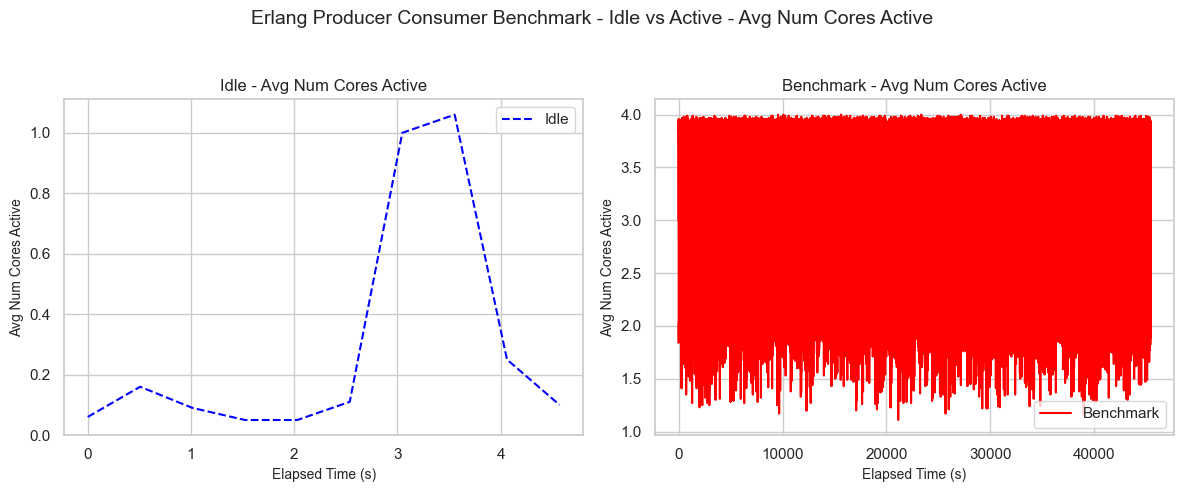

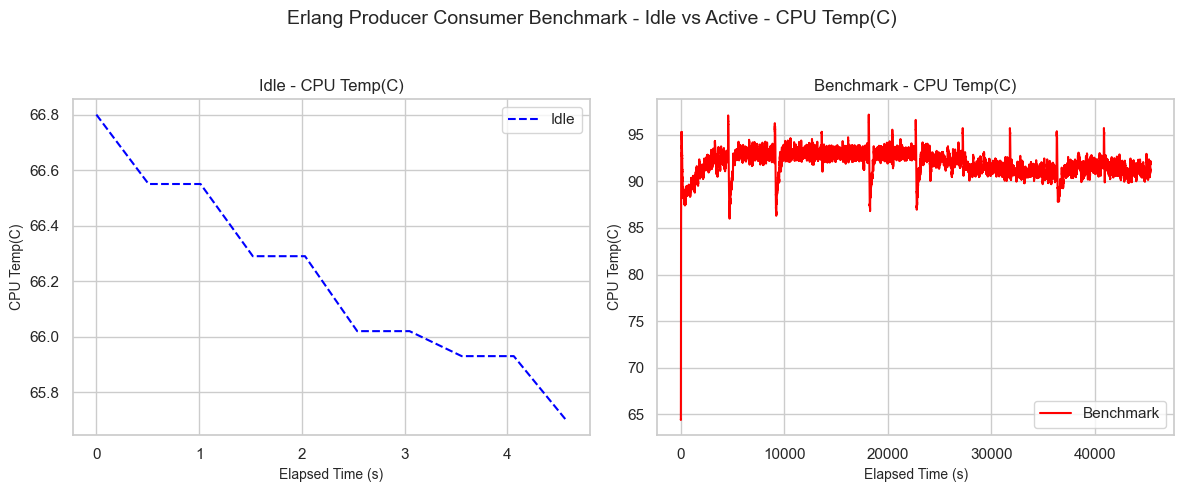

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Producer Consumer Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Producer Consumer Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        # ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()

In [16]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

producers = format_number_str(NP)
consumers = format_number_str(NC)
item_per_producer = format_number_str(IPP)
buffer_size = format_number_str(BB)
title_config_prefix = f"({producers} Producers, {consumers} Consumers,{item_per_producer} Items, {buffer_size} Buffer Size, {ITERATIONS} Iterations)"

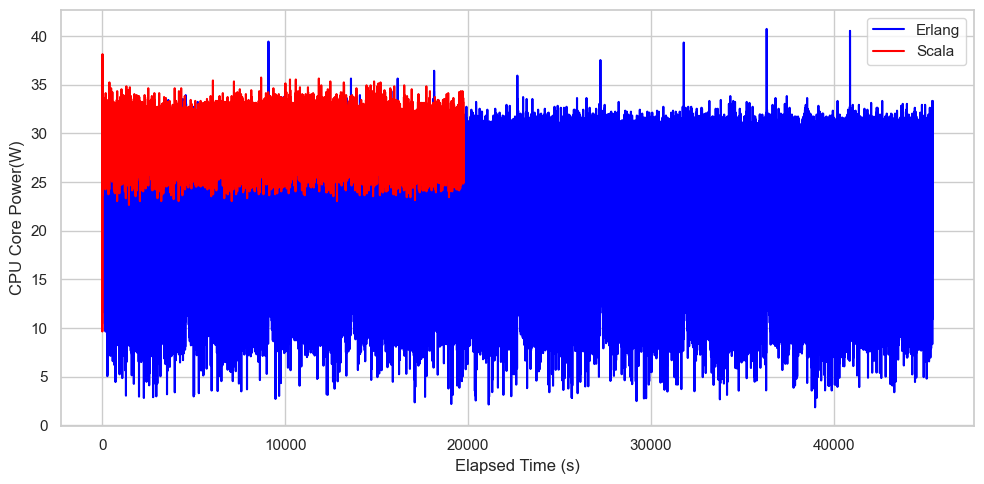

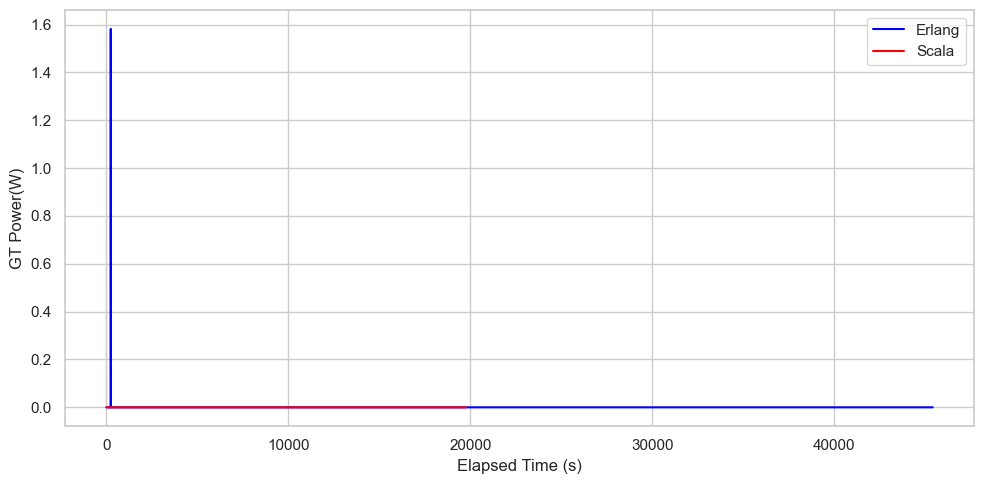

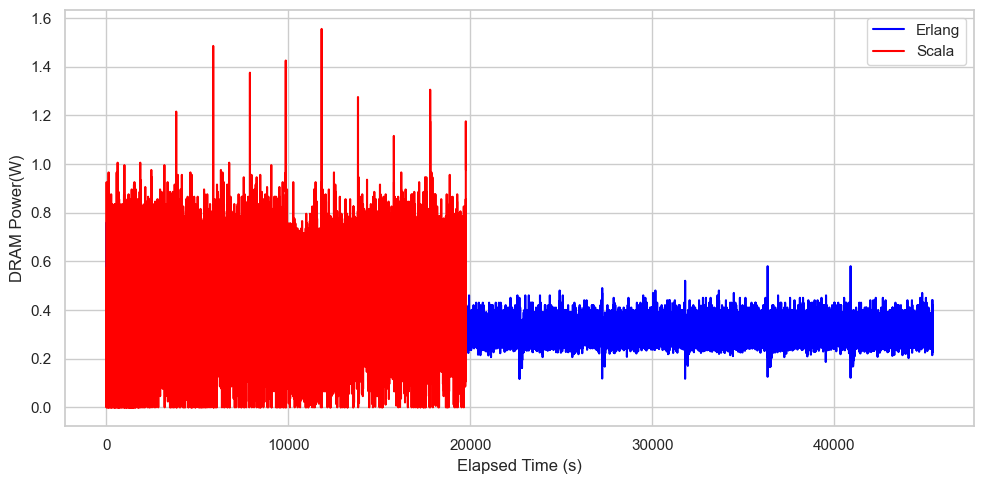

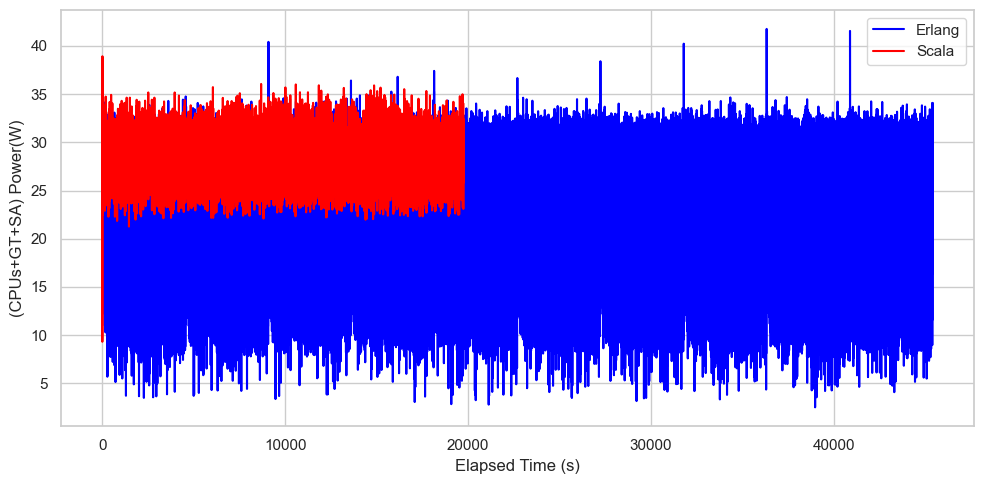

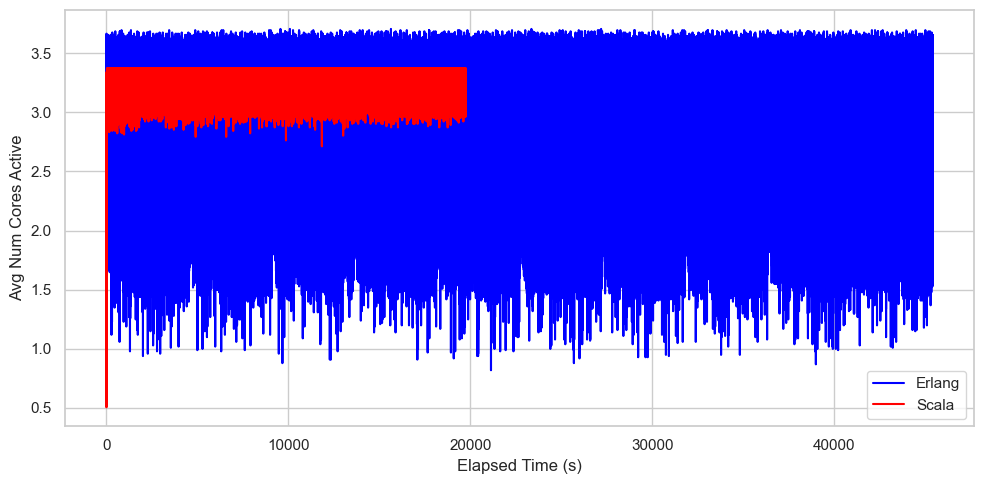

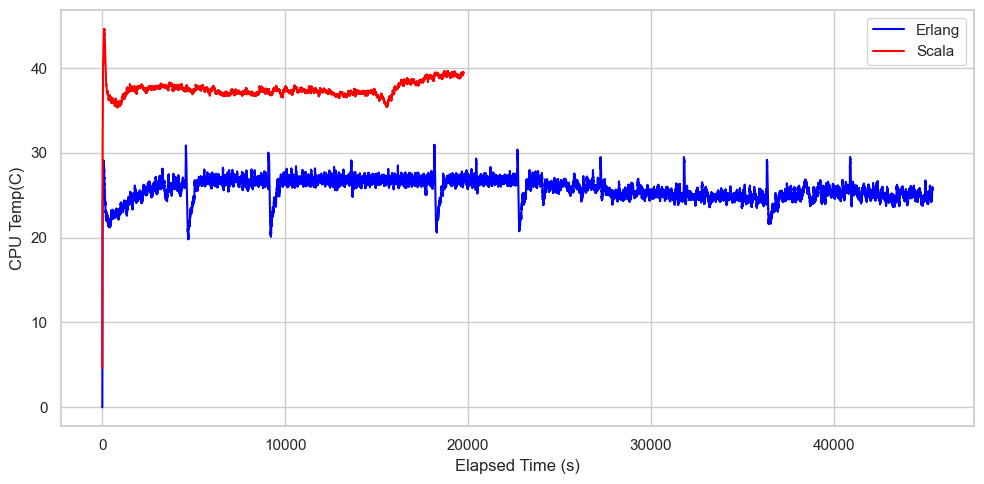

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Producer-Consumer Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        29.041209
GT Power(W)              -0.793863
DRAM Power(W)             0.436267
(CPUs+GT+SA) Power(W)    27.891436
CPU Temp(C)              37.508409
Avg Num Cores Active      3.199235
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        22.908225
GT Power(W)              -0.348133
DRAM Power(W)             0.291675
(CPUs+GT+SA) Power(W)    23.545506
CPU Temp(C)              25.712901
Avg Num Cores Active      2.929269
dtype: float64


Compute Total Energy Consumption

In [20]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "NP": NP,
    "NC": NC,
    "IPP": IPP,
    "BB": BB,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy,
    "Erlang Total Time(s)": erlang_total_time,
    "Scala Total Time(s)": scala_total_time,
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["NC"] == NC) & 
        (existing_data["NP"] == NP) &
        (existing_data["IPP"] == IPP) &
        (existing_data["BB"] == BB) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for NC =", NC, "NP =", NP, "IPP =", IPP, "BB =", BB, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/bnd_buffer/1/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 582241.0034890615 Joules
Erlang Benchmark: 1053338.207738261 Joules
